In [18]:
import pathlib 
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.callbacks import ReduceLROnPlateau
from keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt





In [2]:
dataset_path = pathlib.Path('E:/CS/Robotics club/face mask/Face Mask Dataset')
Test_path = 'E:/CS/Robotics club/face mask/Face Mask Dataset/Test'
Train_path = 'E:/CS/Robotics club/face mask/Face Mask Dataset/Train'
Val_path = 'E:/CS/Robotics club/face mask/Face Mask Dataset/Validation'



In [26]:
#Image data generatro is a class in keras that assembles data augmentation methods 
#augmentation means increasing the data or becoming larger rather than collecting more images manually 
# rescale multiplies every pixel in the preprocessing image 
# shear range makes the computer vision see the images from differenct angels as the human eye behavior 
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, rotation_range=0.2)
val_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2)
#Image normalization #(rescale pixel values from the range of 0-255 to the range 0-1)
test_datagen = ImageDataGenerator(rescale = 1./255)  
training_set = train_datagen.flow_from_directory(Train_path, target_size = (128, 128), interpolation="nearest", 
class_mode='binary', classes=["WithoutMask","WithMask"])

#interpolation knows the unknown data between two known points of data  
validation_set = val_datagen.flow_from_directory(Val_path, target_size=(128, 128), interpolation="nearest", class_mode='binary',
classes=["WithoutMask","WithMask"])

test_set = test_datagen.flow_from_directory(Test_path, target_size = (128, 128), interpolation="nearest", class_mode='binary',
classes=["WithoutMask","WithMask"])



Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [8]:
#function to convert the image into array 
def GetXY(gen):
    listX = []
    listY = []
    for i in range(gen.__len__()):
        gennext = gen.next()
        listX.append(gennext[0])
        listY.append(gennext[1])
    x=np.concatenate(listX)
    y=np.concatenate(listY)
    return (x,y)

In [28]:
#assign the training and testing data in variables after augmentation and becoming array 
trainX,trainY = GetXY(training_set)
valX,valY = GetXY(validation_set)
testX,testY = GetXY(test_set)

In [27]:
#the convolution procuders has three repeated steps for 3 times (conv2D, Maxpooling,Dropout)
#1st convolution 
input_data = Input(shape=(128, 128, 3))
x = Conv2D(32, (3, 3), activation="relu")(input_data) #ReLU takes any value greater than 0 without change; otherwise, the value is 0
x = MaxPooling2D(pool_size = (4, 4), strides=(4, 4))(x) # takes the max value of each 4x4 matrix 
x = Dropout(0.25)(x) #reduces the overfitting and the large complex number in NN 
#2nd convolution 
x = Conv2D(32, (3, 3), activation="relu")(x)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Dropout(0.3)(x)
#3rd convolution 
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)
#fully connected layer formed by feature maps were fabricated by the former convolution
x = Flatten()(x)
x = Dense(128, activation = 'relu')(x)
output = Dense(1, activation = 'sigmoid')(x) #sigmoid range is [0,1] for reducing the loss value during the training 
cnn = Model(inputs=input_data, outputs=output)
# Compiling the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#adam can handle sparse gradients on noisy problems
#cross entropy measures the difference between two events or probabilities and it is binary to set 0 withmask and 1 withoutmask
cnn.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                      

In [11]:
#ReduceLROnPlateau is for reducing the learning rate when the model stops improving during the training
callbacks = [ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=0.00001)]
history = cnn.fit(trainX, trainY, epochs = 15, verbose = 1, batch_size=32, validation_data = (valX, valY), callbacks=callbacks)
#batch size is the number of samples that are chosen for training with each epoch


Epoch 1/15
313/313 [==============================] - 71s 207ms/step - loss: 0.2100 - accuracy: 0.9132 - val_loss: 0.1452 - val_accuracy: 0.9525 - lr: 0.0010
Epoch 2/15
313/313 [==============================] - 66s 211ms/step - loss: 0.0933 - accuracy: 0.9659 - val_loss: 0.0592 - val_accuracy: 0.9862 - lr: 0.0010
Epoch 3/15
313/313 [==============================] - 67s 213ms/step - loss: 0.0683 - accuracy: 0.9778 - val_loss: 0.0314 - val_accuracy: 0.9937 - lr: 0.0010
Epoch 4/15
313/313 [==============================] - 67s 215ms/step - loss: 0.0501 - accuracy: 0.9823 - val_loss: 0.0315 - val_accuracy: 0.9912 - lr: 0.0010
Epoch 5/15
313/313 [==============================] - 66s 211ms/step - loss: 0.0402 - accuracy: 0.9869 - val_loss: 0.0334 - val_accuracy: 0.9912 - lr: 0.0010
Epoch 6/15
313/313 [==============================] - 68s 216ms/step - loss: 0.0364 - accuracy: 0.9871 - val_loss: 0.0212 - val_accuracy: 0.9925 - lr: 0.0010
Epoch 7/15
313/313 [==============================] 

In [15]:
cnn.evaluate(testX, testY, verbose=2)
#verbose is for regular expression and readable patterns
predict = (cnn.predict(testX) > 0.5).astype("int32")
print(classification_report(testY,predict))
print(confusion_matrix(testY, predict))
#confusion matrix is table or classifier for the positive and negative probabilties or results 
#recall = true positive / (true positive +false negative)
#f1 score = relation between recall and precision 
#support is the true samples in the specified class


31/31 - 2s - loss: 0.0260 - accuracy: 0.9909 - 2s/epoch - 59ms/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       509
         1.0       1.00      0.99      0.99       483

    accuracy                           0.99       992
   macro avg       0.99      0.99      0.99       992
weighted avg       0.99      0.99      0.99       992

[[507   2]
 [  7 476]]


In [16]:
print('Accuracy:', accuracy_score(testY, predict))


Accuracy: 0.9909274193548387


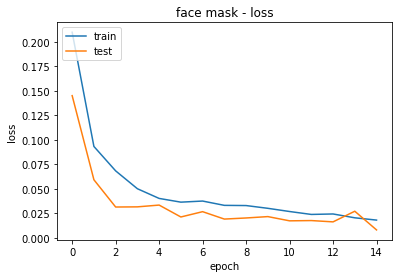

In [23]:
#loss value vs epochs graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('face mask - loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

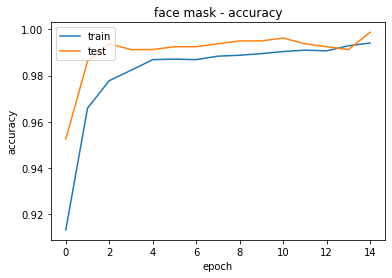

In [25]:
# accuracy vs epochs graph 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('face mask - accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#according to both of them, the model is neither underfitting nor overfitting 